<font size=6>Laboratorio 7</font>

<font size=4>Johan Andres Mendez Macea</font>

# Librerias

In [197]:
!pip3 install nltk 
!pip3 install wordcloud 
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# DBScan
from sklearn.cluster import DBSCAN
from collections import Counter

# Punto 2
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import wordnet
import regex as rx
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords

[nltk_data] Downloading package stopwords to /home/johan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/johan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Punto 1

### Datos

In [134]:
df_espiral=pd.read_csv('http://cs.joensuu.fi/sipu/datasets/spiral.txt','\t',header=None)
df_espiral.columns=['x','y','tipo']
df_espiral


/home/johan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,x,y,tipo
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


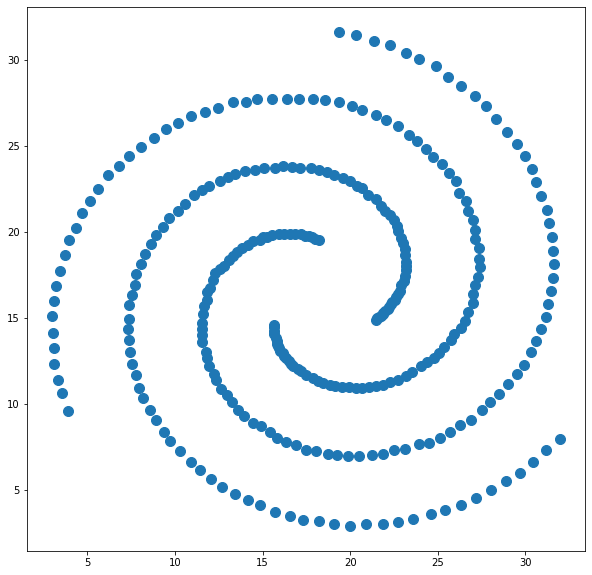

In [135]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.scatter(x='x',y='y',data=df_espiral,s=100)
plt.show()

## K-Means

In [136]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
X=df_espiral.iloc[:,[0,1]].values
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [137]:
kmeans.cluster_centers_

array([[13.84583333, 22.51583333],
       [17.17323944,  8.93239437],
       [24.22105263, 24.3254386 ],
       [26.025     , 13.29932432],
       [ 7.737     , 14.874     ]])

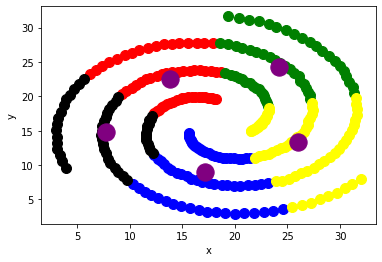

In [138]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100,c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<font size=6> Notar qué ...</font>

<font size=4>Para diferentes numeros de clusters el valor de la silueta se mantiene invariante</font>

### Inercía

[(2, 19578.005224358967),
 (3, 12289.186981270388),
 (4, 9201.186390308707),
 (5, 7358.407881647397),
 (6, 5993.933987613444),
 (7, 5298.515156449681),
 (8, 4659.330707497739),
 (9, 4093.1681007295742)]

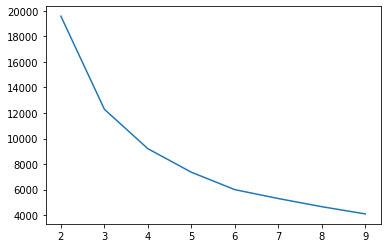

In [139]:
inertia = []
silueta=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silueta.append(silhouette_score(X,kmeans.fit_predict(X)))
plt.plot(range(2,10),inertia)
plt.xlabel
list(zip(np.arange(2,10),inertia))


<font size=5> Desde *6* clusters hasta *9* clusters se ve como se suaviza la grafica por lo qué el n ideal será dejado a criterio de la silueta con esperanza a escoger un valor dentro de ese rango.</font>

### Análisis silueta

In [140]:
maximo= max(silueta)
indicemax=0
for i,k in enumerate(silueta):
    print(F"#Clusters: {i+2}, Silueta: {k}")
    if maximo == k:
        indicemax=i+2
print('\n')
print(F'La mejor silueta es de {indicemax} clusters con el valor de {silueta[indicemax-2]}')
    

#Clusters: 2, Silueta: 0.3472315326025985
#Clusters: 3, Silueta: 0.36015219165079254
#Clusters: 4, Silueta: 0.3540320490896512
#Clusters: 5, Silueta: 0.34704362629932956
#Clusters: 6, Silueta: 0.35207301652392314
#Clusters: 7, Silueta: 0.35483438054958943
#Clusters: 8, Silueta: 0.3510160512934154
#Clusters: 9, Silueta: 0.3641287610330286


La mejor silueta es de 9 clusters con el valor de 0.3641287610330286


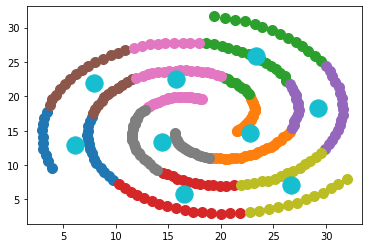

In [141]:

km=KMeans(n_clusters=indicemax,init = 'k-means++', random_state = 42)
y_predict=km.fit_predict(X)
for i in range(indicemax):
    plt.scatter(X[y_predict==i,0],X[y_predict==i,1], s=100, label=F'Cluster {i}')
plt.scatter(km.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.show()


## DBScan

In [142]:
dbscan = DBSCAN(eps=2, min_samples=2)
model = dbscan.fit(X)
y_dbscan=dbscan.fit_predict(X)
y_dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

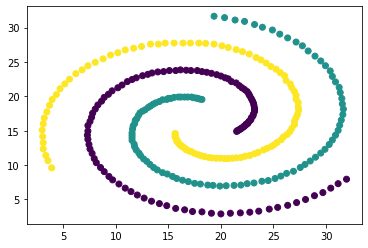

In [143]:
plt.scatter(X[:,0],X[:,1],c=y_dbscan)

<font size=5> Se puede ver en la grafica que todos los puntos han sido agrupados en la forma de los datos exitosamente </font>

### Análisis conjuntos y clusters

In [144]:
labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_]=True
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print('Number of clusters: %0.0f' % n_clusters_)
print('Number of total groups: %0.0f' % len(Counter(labels).keys()))


Number of clusters: 3
Number of total groups: 3


### Coeficiente de silueta

In [145]:
print('Silhouette coefficient: %0.3f' % silhouette_score(X,labels))

Silhouette coefficient: 0.001


<font size=5>A pesar de encajar perfectamente en la forma de los datos, el coeficiente no arroja resultados favorables para la efectividad del modelo, puesto que el valor es muy bajo, dejando al K-Means en ventaja en este aspecto. En otros valores para .</font>

***

# Punto 2



## Datos

In [146]:
stopw=stopwords.words('english')
reviews=pd.read_csv('IMDB Dataset.csv')
reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Limpieza

In [147]:
limpieza=reviews.copy()

In [148]:
limpieza=limpieza.drop(columns=['sentiment'])
sentimiento=reviews.loc[:,['sentiment']]


In [149]:
a='@'
c='c'
prueba=limpieza.iloc[1,0]

print(prueba)
# limpieza


A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


In [206]:
def patrones():
    vector=['<[a-zA-Z \/]*>']
    vector.append('[^a-zA-Z \t\s\']|(?<=.)+\' | \' +|\'(?!.)|(?=\w)+\'(?:s|d|ve|ll|t)|\'(?=\w)')
    reemplazar=[F"^(?:(?:{x[0]}|{x[0].upper()}){x[1:]}) " for x in stopw]
    reemplazar='|'.join(reemplazar)
    vector.append(reemplazar)
    reemplazar=[F" (?:(?:{x[0]}|{x[0].upper()}){x[1:]}) " for x in stopw]
    reemplazar='|'.join(reemplazar)
    vector.append(reemplazar)
    vector.append(['  +'])
    return vector

patron=patrones()
def limpiar(texto:str,patrones:list):
    stemm=wordnet.WordNetLemmatizer()
    filtro=texto
    for i in range(len(patrones)):
        if i < len(patrones)-1:
            patt=rx.Regex(patrones[i])
            filtro=' '.join(patt.split(filtro))
    patt=rx.Regex(patrones[i-1])
    resultado=' '.join(patt.split(filtro))
    resultado=resultado.strip().split()
    resultado=[stemm.lemmatize(x) for x in resultado]
    return resultado



In [216]:
print(remove_stopwords(' '.join(limpiar(prueba,patron))))

wonderful little production filming technique unassuming old time BBC fashion comforting discomforting sense realism entire piece actor extremely chosen Michael Sheen got polari voice pat truly seamless editing guided reference Williams diary entry worth watching terrificly written performed piece masterful production great master comedy life realism come home little thing fantasy guard use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwell mural decorating surface terribly


<font size=6> Aplicar la función a todos los datos</font>

In [207]:
limpio=limpieza[['review']].applymap(lambda x: remove_stopwords(' '.join(limpiar(x,patron))))
limpio

,review
0,One reviewer mentioned watching Oz episode hoo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,Basically family little boy Jake think zombie ...
4,Petter Mattei Love Time Money visually stunnin...
...,...
49995,thought movie right good job creative original...
49996,Bad plot bad dialogue bad acting idiotic direc...
49997,Catholic taught parochial elementary school nu...
49998,going disagree previous comment Maltin second ...


## TF-IDF

In [208]:
vectorizer=TfidfVectorizer(max_features=40)
# vectorizer.fit_transform()
X=vectorizer.fit_transform(list(limpio.values[:,0]))
X

<50000x40 sparse matrix of type '<class 'numpy.float64'>'
	with 473535 stored elements in Compressed Sparse Row format>

In [209]:
frecuentes=pd.DataFrame(vectorizer.get_feature_names(),columns=['Palabras valiosas'])
frecuentes

,Palabras valiosas
0,acting
1,actor
2,bad
3,best
4,better
5,character
6,come
7,director
8,end
9,film


In [210]:
## Análisis de clusters mas eficientes
# X2=list(limpio.values[:,0])
inercia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)
print(inercia)


[37504.155395414404, 34623.00964495263, 32934.324521963055, 32311.995275259047, 31729.463570602762, 31259.11650598624, 30801.713303656903, 30355.977670491357, 29958.807493277345, 29621.560686970675]


Text(0.5, 1.0, 'Grafica de inercia')

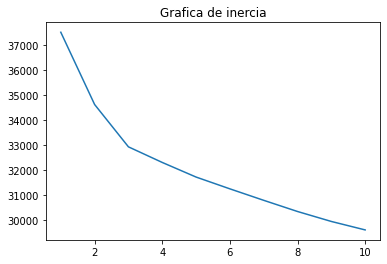

In [231]:
plt.plot(range(1,11),inercia)
plt.title('Grafica de inercia')

<font size=5>La grafica de inercia me lleva a escoger un valor optimo en k = 4 por la suavización de la grafica<font/>

In [223]:
eficiente=KMeans(n_clusters=4,init='k-means++',random_state=70)
y_kmeans=eficiente.fit_predict(X)


In [224]:
procesando=pd.DataFrame(X.todense(),columns=frecuentes.T.values.tolist()[0])

In [225]:
procesando=procesando.groupby(y_kmeans).mean()
procesando

,acting,actor,bad,best,better,character,come,director,end,film,...,story,thing,think,time,want,watch,watching,way,work,year
0,0.056592,0.051337,0.043455,0.043918,0.049214,0.074000,0.036935,0.032713,0.048834,0.070199,...,0.069830,0.057885,0.062959,0.091041,0.043128,0.069705,0.050196,0.053683,0.031282,0.041928
1,0.044234,0.057574,0.018678,0.066589,0.051517,0.110553,0.056369,0.041121,0.056294,0.091590,...,0.111078,0.067892,0.064096,0.110605,0.048684,0.059344,0.042192,0.073504,0.056140,0.068144
2,0.104912,0.062426,0.423138,0.032012,0.057880,0.064697,0.039459,0.037879,0.044257,0.133761,...,0.057956,0.073717,0.051909,0.081616,0.042916,0.062043,0.048515,0.055434,0.033196,0.035644
3,0.049966,0.051216,0.038307,0.054957,0.044979,0.087691,0.043590,0.055178,0.051033,0.555012,...,0.081246,0.047509,0.049273,0.089777,0.035850,0.048811,0.035823,0.060951,0.052372,0.053587


<font size=5> Se puede apreciar en este DataFrame la matriz de pesos(importancia) para cada las 70 palabras más frecuentadas<font/>

(-0.5, 999.5, 999.5, -0.5)

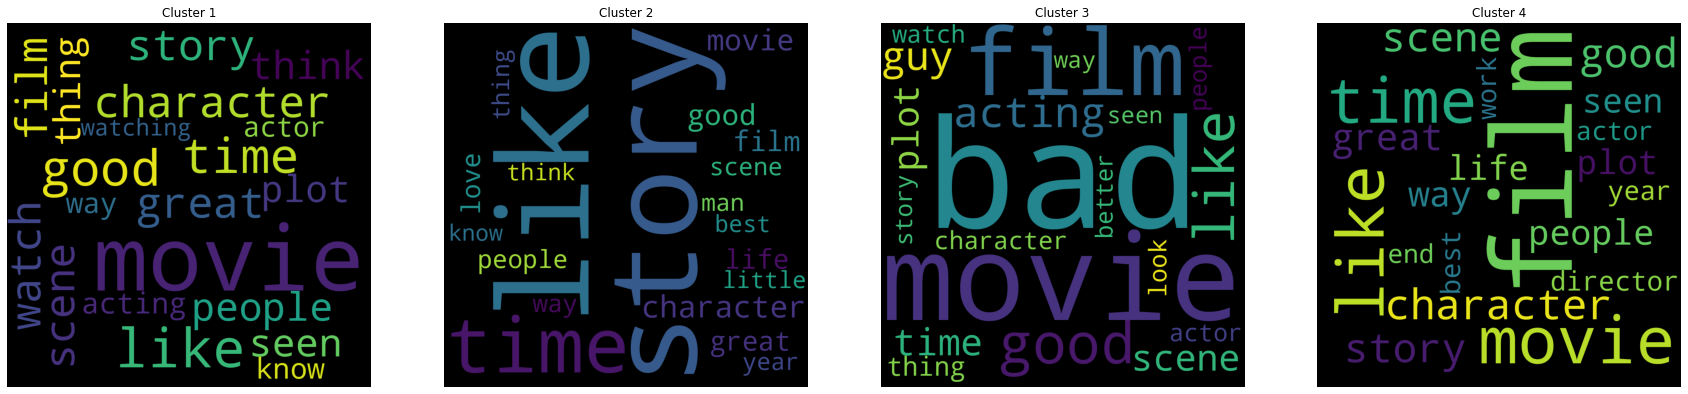

In [229]:
wordcloud = WordCloud(width = 1000, height = 1000,background_color ='black',
                min_font_size = 10)
fig,ax=plt.subplots(1,4,figsize=(30,30))

for x in range(4):
    wordcloud.fit_words(procesando.iloc[x].sort_values(ascending=False)[:20])
    ax[x].imshow(wordcloud)
    ax[x].set_title(F"Cluster {x+1}")
    ax[x].axis('off')

# for i in range(4):
plt.axis('off')


<font size=5>En conclusión podemos ver en los diferentes clusters palabras claves que se han repetido a lo largo de las 50000 reviews, estas son un determinante crucial para conocer el sentido de la review de una persona para cierta pelicula donde se conozcan las reviews <font/>